In [1]:
import pandas as pd
import numpy as np
import os
import string
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
land_cover_CT = pd.read_excel('../../../data/raw/table 2015.xlsx', sheet_name='Sheet 1')
town_MSA = pd.read_excel('../../../data/tidy/Town-name-MSA.xls', sheet_name='CEC_AggregateEnergyUsgeReport')

In [3]:
land_cover_CT
land_cover_CT_cleaned = land_cover_CT.dropna()
land_cover_CT_cleaned = land_cover_CT_cleaned.reset_index(drop=True)

In [4]:
land_cover_CT_only_town = land_cover_CT_cleaned.drop(land_cover_CT_cleaned.index[-1])

In [5]:
land_cover_CT_only_town 

,Town,Unnamed: 1,developed,turf & grass,other grass,ag field,deciduous forest,coniferous forest,water,non-forested wetland,forested wetland,tidal wetland,barren,utility row
0,Andover,2015,901.2,326.6,249.7,488.6,7197.5,76.8,339.6,75.3,267.3,0.0,23.4,110.9
1,Ansonia,2015,1920.4,382.4,43.3,32.3,1378.0,38.2,125.1,14.7,42.5,0.0,23.2,0.0
2,Ashford,2015,1875.5,677.3,306.6,1816.5,16275.5,2541.4,536.4,198.1,1015.3,0.0,25.9,0.0
3,Avon,2015,3550.7,1773.9,275.1,511.0,5730.5,2167.5,440.8,24.5,422.6,0.0,74.1,21.7
4,Barkhamsted,2015,1826.6,494.5,320.1,548.1,6932.8,11942.5,1821.8,86.3,692.1,0.0,57.8,52.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,Windsor Locks,2015,3274.8,615.1,440.8,181.7,1066.9,38.3,239.4,1.1,58.0,0.0,60.2,0.0
165,Wolcott,2015,2809.1,856.6,243.8,75.7,8030.9,401.4,495.9,11.2,385.4,0.0,85.4,144.3
166,Woodbridge,2015,2419.3,1414.3,168.2,291.0,6713.7,414.0,254.2,63.7,421.7,0.0,17.0,106.9
167,Woodbury,2015,2477.2,1313.5,293.5,3233.5,13533.7,1611.7,232.3,57.5,559.9,0.0,148.2,54.0


In [6]:
# Specify the position (column index) where you want to insert the new column
position = 1  # Insert between the first and second columns

# Insert the new column
land_cover_CT_only_town.insert(position, 'County', town_MSA['County Name'])

In [7]:
land_cover_CT_only_town
land_cover_CT_only_town.to_csv('../../../data/tidy/land_cover_CT.csv')

In [8]:
land_cover_CT_only_town

#just change the county name of the five town
land_cover_CT_only_town.loc[land_cover_CT_only_town['Town'] == 'Bridgewater', 'County'] = 'Fairfield'
land_cover_CT_only_town.loc[land_cover_CT_only_town['Town'] == 'New Milford', 'County'] = 'Fairfield'
land_cover_CT_only_town.loc[land_cover_CT_only_town['Town'] == 'Lyme', 'County'] = 'Hartford'
land_cover_CT_only_town.loc[land_cover_CT_only_town['Town'] == 'Old Lyme', 'County'] = 'Hartford'
land_cover_CT_only_town.loc[land_cover_CT_only_town['Town'] == 'Colchester', 'County'] = 'Hartford'

In [9]:
target_values = ['Tolland', 'New Haven', 'Hartford','Middlesex', 'Fairfield']  # Replace with your specific target values

# Create a boolean mask to filter rows based on the target values
mask = land_cover_CT_only_town['County'].isin(target_values)  # Replace 'Column_Name' with the actual column name

# Keep only the rows with the specified values in the specified column
land_cover_filtered = land_cover_CT_only_town[mask]

In [10]:
land_cover_filtered = land_cover_filtered.reset_index(drop=True)

In [11]:
target = ['Tolland', 'Hartford','Middlesex']  # Replace with your specific target values

# Create a boolean mask to filter rows based on the target values
mask = land_cover_filtered['County'].isin(target)  # Replace 'Column_Name' with the actual column name

# Keep only the rows with the specified values in the specified column
land_cover_HEM = land_cover_filtered[mask]

In [16]:
columns_to_sum = ['deciduous forest', 'coniferous forest', 'forested wetland']  # Replace with your specific column names

# Calculate the sum of the specified columns
sum_of_columns_HEM = land_cover_HEM[columns_to_sum].sum()
sum_of_columns_HEM

deciduous forest     474539.6
coniferous forest     87224.3
forested wetland      37719.0
dtype: float64

In [25]:
target = ['New Haven']  # Replace with your specific target values

# Create a boolean mask to filter rows based on the target values
mask = land_cover_filtered['County'].isin(target)  # Replace 'Column_Name' with the actual column name

# Keep only the rows with the specified values in the specified column
land_cover_NHM = land_cover_filtered[mask]
# Calculate the sum of the specified columns
sum_of_columns_NHM = land_cover_NHM[columns_to_sum].sum()
sum_of_columns_NHM

deciduous forest     165339.9
coniferous forest     13004.8
forested wetland      11402.3
dtype: float64

In [18]:
target = ['Fairfield']  # Replace with your specific target values

# Create a boolean mask to filter rows based on the target values
mask = land_cover_filtered['County'].isin(target)  # Replace 'Column_Name' with the actual column name

# Keep only the rows with the specified values in the specified column
land_cover_BSN = land_cover_filtered[mask]
# Calculate the sum of the specified columns
sum_of_columns_BSN = land_cover_BSN[columns_to_sum].sum()
sum_of_columns_BSN

deciduous forest     192503.0
coniferous forest     18299.9
forested wetland      11986.5
dtype: float64

In [19]:
target = ['New Haven']  # Replace with your specific target values

# Create a boolean mask to filter rows based on the target values
mask = land_cover_filtered['County'].isin(target)  # Replace 'Column_Name' with the actual column name

# Keep only the rows with the specified values in the specified column
land_cover_NHM = land_cover_filtered[mask]
# Calculate the sum of the specified columns
sum_of_columns_NHM = land_cover_NHM[columns_to_sum].sum()
sum_of_columns_NHM

deciduous forest     165339.9
coniferous forest     13004.8
forested wetland      11402.3
dtype: float64

In [20]:
df = pd.DataFrame({'BSN': sum_of_columns_BSN, 'HEM':sum_of_columns_HEM,'NHM':sum_of_columns_NHM})

In [21]:
df

,BSN,HEM,NHM
deciduous forest,192503.0,474539.6,165339.9
coniferous forest,18299.9,87224.3,13004.8
forested wetland,11986.5,37719.0,11402.3


In [22]:
MSA_land = df.T

In [23]:
MSA_land# the unit are acres

,deciduous forest,coniferous forest,forested wetland
BSN,192503.0,18299.9,11986.5
HEM,474539.6,87224.3,37719.0
NHM,165339.9,13004.8,11402.3


In [24]:
MSA_land['Deciduous forest (hectare)']=MSA_land['deciduous forest']*0.4047
MSA_land['Coniferous forest (hectare)']=MSA_land['coniferous forest']*0.4047
MSA_land['Forested wetland (hectare)']=MSA_land['forested wetland']*0.4047

In [25]:
#calculate the carbon dioxide sequestration rate
#sequestration rate = 2.23 metric ton/hectare/year
MSA_land['Deciduous forest sequestration (MTCO2e)'] = MSA_land['Deciduous forest (hectare)']*2.23*44/12
MSA_land['Coniferous forest sequestration (MTCO2e)'] = MSA_land['Coniferous forest (hectare)']*2.23*44/12
MSA_land['Forested wetland sequestration (MTCO2e)'] = MSA_land['Forested wetland (hectare)']*2.23*44/12

In [26]:
MSA_land

,deciduous forest,coniferous forest,forested wetland,Deciduous forest (hectare),Coniferous forest (hectare),Forested wetland (hectare),Deciduous forest sequestration (MTCO2e),Coniferous forest sequestration (MTCO2e),Forested wetland sequestration (MTCO2e)
BSN,192503.0,18299.9,11986.5,77905.96410,7405.96953,4850.93655,6.370111e+05,60556.144190,39664.491190
HEM,474539.6,87224.3,37719.0,192046.17612,35299.67421,15264.87930,1.570298e+06,288633.669457,124815.829743
NHM,165339.9,13004.8,11402.3,66913.05753,5263.04256,4614.51081,5.471258e+05,43034.144666,37731.316723


In [27]:
columns_to_delete = ['deciduous forest', 'coniferous forest', 'forested wetland']  # Replace with your specific column names

# Drop the specified columns
MSA_land = MSA_land.drop(columns=columns_to_delete)


In [28]:
total = MSA_land.iloc[:, -3:].sum(axis=1)

In [29]:
MSA_land['Total carbon sequestration (MMTCO2e)']=total/1000000

In [30]:
MSA_land

,Deciduous forest (hectare),Coniferous forest (hectare),Forested wetland (hectare),Deciduous forest sequestration (MTCO2e),Coniferous forest sequestration (MTCO2e),Forested wetland sequestration (MTCO2e),Total carbon sequestration (MMTCO2e)
BSN,77905.96410,7405.96953,4850.93655,6.370111e+05,60556.144190,39664.491190,0.737232
HEM,192046.17612,35299.67421,15264.87930,1.570298e+06,288633.669457,124815.829743,1.983747
NHM,66913.05753,5263.04256,4614.51081,5.471258e+05,43034.144666,37731.316723,0.627891


In [31]:
#emissions from the forest, -1 represents negative emissions
MSA_land.loc[['BSN', 'NHM']] = MSA_land.loc[['NHM', 'BSN']].values
MSA_land = MSA_land.rename(index={'BSN': 'NHM', 'NHM': 'BSN'})
MSA_land.to_csv('../../../data/tidy/land-cover-emissions.csv')

In [32]:
MSA_land

,Deciduous forest (hectare),Coniferous forest (hectare),Forested wetland (hectare),Deciduous forest sequestration (MTCO2e),Coniferous forest sequestration (MTCO2e),Forested wetland sequestration (MTCO2e),Total carbon sequestration (MMTCO2e)
NHM,66913.05753,5263.04256,4614.51081,5.471258e+05,43034.144666,37731.316723,0.627891
HEM,192046.17612,35299.67421,15264.87930,1.570298e+06,288633.669457,124815.829743,1.983747
BSN,77905.96410,7405.96953,4850.93655,6.370111e+05,60556.144190,39664.491190,0.737232


<Figure size 1000x600 with 0 Axes>

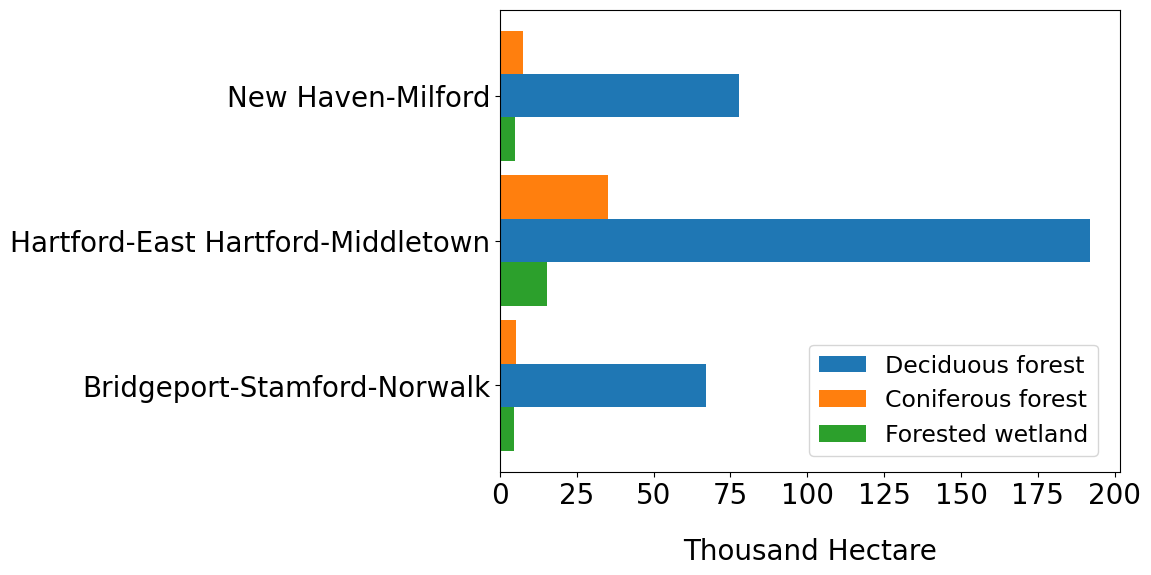

In [33]:
plt.figure(figsize=(10, 6))
X = ['Bridgeport-Stamford-Norwalk','Hartford-East Hartford-Middletown', 'New Haven-Milford']

Deciduous = MSA_land['Deciduous forest (hectare)']/1000#NH, HH, BSN
Coniferous = MSA_land['Coniferous forest (hectare)']/1000
Forested_wetland = MSA_land['Forested wetland (hectare)']/1000

Y_axis = np.arange(len(X))
bar_width = 0.3  # Width of each bar

plt.figure(figsize=(8, 6))

# Plot the bars for Natural gas emissions
plt.barh(Y_axis , Deciduous, bar_width, label='Deciduous forest')



plt.barh(Y_axis + bar_width, Coniferous , bar_width, label='Coniferous forest')

# Plot the bars for Propane emissions
plt.barh(Y_axis - bar_width, Forested_wetland, bar_width, label='Forested wetland')



plt.yticks(Y_axis, X)  # Use yticks instead of xticks

plt.xlabel("Thousand Hectare",fontsize=20, labelpad=20)
plt.xticks(fontsize=20)  # Adjust the font size as needed
plt.yticks(fontsize=20)
plt.legend(loc='upper left', bbox_to_anchor=(0.48, 0.3),fontsize=17)
#plt.show()
plt.savefig('../../../figures/Report-images/forest-area.png', dpi=600,bbox_inches='tight')

<Figure size 1000x600 with 0 Axes>

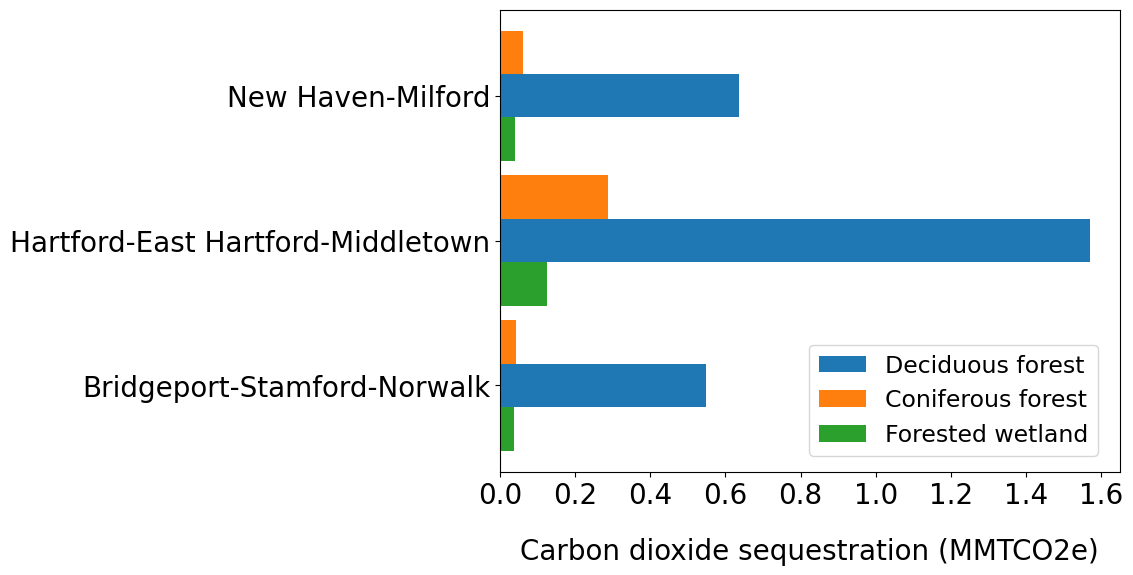

In [34]:
plt.figure(figsize=(10, 6))
X = ['Bridgeport-Stamford-Norwalk','Hartford-East Hartford-Middletown', 'New Haven-Milford']

Deciduous = MSA_land['Deciduous forest sequestration (MTCO2e)']/1000000#NH, HH, BSN
Coniferous = MSA_land['Coniferous forest sequestration (MTCO2e)']/1000000
Forested_wetland = MSA_land['Forested wetland sequestration (MTCO2e)']/1000000

Y_axis = np.arange(len(X))
bar_width = 0.3  # Width of each bar

plt.figure(figsize=(8, 6))

# Plot the bars for Natural gas emissions
plt.barh(Y_axis , Deciduous, bar_width, label='Deciduous forest')



plt.barh(Y_axis + bar_width, Coniferous , bar_width, label='Coniferous forest')

# Plot the bars for Propane emissions
plt.barh(Y_axis - bar_width, Forested_wetland, bar_width, label='Forested wetland')



plt.yticks(Y_axis, X)  # Use yticks instead of xticks

plt.xlabel("Carbon dioxide sequestration (MMTCO2e)",fontsize=20, labelpad=20)
plt.xticks(fontsize=20)  # Adjust the font size as needed
plt.yticks(fontsize=20)
plt.legend(loc='upper left', bbox_to_anchor=(0.48, 0.3),fontsize=17)
#plt.show()
plt.savefig('../../../figures/Report-images/carbon-sequestration.png', dpi=600,bbox_inches='tight')

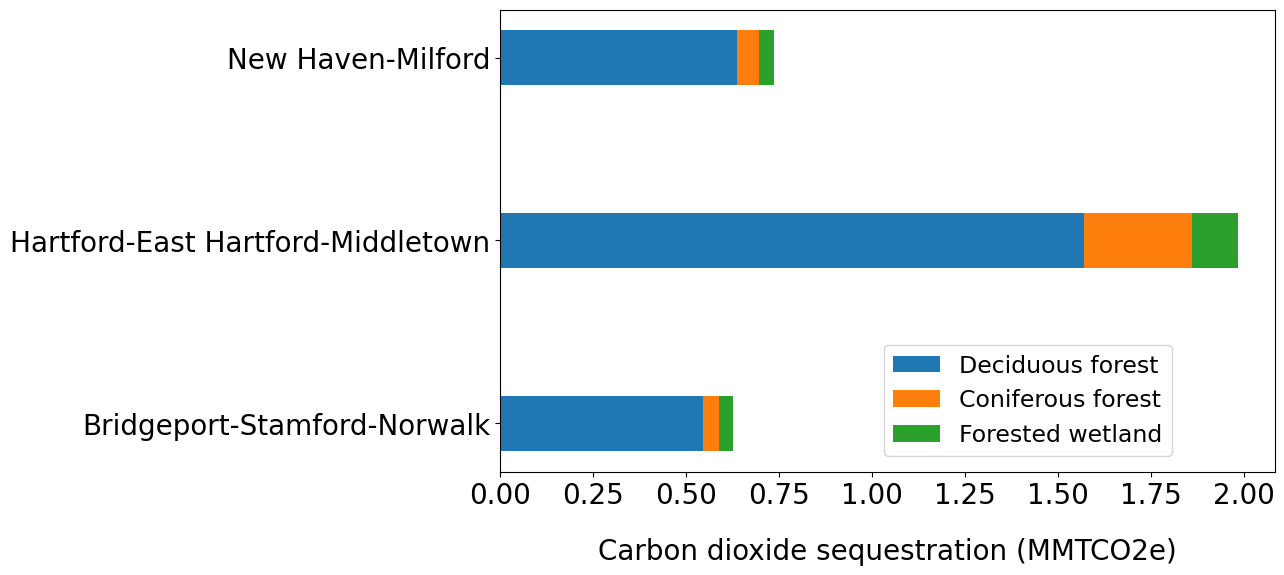

In [35]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

X = ['Bridgeport-Stamford-Norwalk', 'Hartford-East Hartford-Middletown', 'New Haven-Milford']

Deciduous = MSA_land['Deciduous forest sequestration (MTCO2e)'] / 1000000
Coniferous = MSA_land['Coniferous forest sequestration (MTCO2e)'] / 1000000
Forested_wetland = MSA_land['Forested wetland sequestration (MTCO2e)'] / 1000000

bar_width = 0.3  # Width of each bar

# Plot the stacked bars for carbon sequestration with flipped axes
plt.barh(X, Deciduous, label='Deciduous forest', height=bar_width)
plt.barh(X, Coniferous, left=Deciduous, label='Coniferous forest', height=bar_width)
plt.barh(X, Forested_wetland, left=Deciduous + Coniferous, label='Forested wetland', height=bar_width)

#plt.ylabel("Region", fontsize=20, labelpad=20)
plt.xlabel("Carbon dioxide sequestration (MMTCO2e)", fontsize=20, labelpad=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='upper left', bbox_to_anchor=(0.48, 0.3), fontsize=17)

plt.savefig('../../../figures/Report-images/carbon-sequestration.png', dpi=600, bbox_inches='tight')
plt.show()

